<a href="https://colab.research.google.com/github/Israelchguevara/Global-Air-Pollution/blob/main/Visualizaci%C3%B3n_Avanzada_Global_Air_Pollution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importamos las librerías que utilizaremos para este análisis.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
plt.style.use('ggplot')
# pd.set_option('max_columns', 200)
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!pip install scikit-misc

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.0/189.0 kB 5.0 MB/s eta 0:00:00


**Procedemos a cargar el fichero global_air_pollution_data.csv**

In [ ]:

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/global_air_pollution_data.csv')
df = data

**Información del Dataset**

In [ ]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   country_name        23036 non-null  object
 1   city_name           23462 non-null  object
 2   aqi_value           23463 non-null  int64 
 3   aqi_category        23463 non-null  object
 4   co_aqi_value	       23463 non-null  int64 
 5   co_aqi_category     23463 non-null  object
 6   ozone_aqi_value     23463 non-null  int64 
 7   ozone_aqi_category  23463 non-null  object
 8   no2_aqi_value       23463 non-null  int64 
 9   no2_aqi_category    23463 non-null  object
 10  pm2.5_aqi_value     23463 non-null  int64 
 11  pm2.5_aqi_category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB


**Descripción del Dataset**

• **country_name** → Nombre del país

• **city_name** → Nombre de la ciudad

• **aqi_value** → Valor total del Índice de Calidad del Aire (AQI) de la ciudad

• **aqi_category** → Categoría total del Índice de Calidad del Aire (AQI) de la ciudad

•  **co_aqi_value** → Valor del AQI para Monóxido de Carbono en la ciudad

• **co_aqi_category** → Categoría del AQI para Monóxido de Carbono en la ciudad

• **ozone_aqi_value** → Valor del AQI para Ozono en la ciudad

• **ozone_aqi_category** → Categoría del AQI para Ozono en la ciudad

• **no2_aqi_value** → Valor del AQI para Dióxido de Nitrógeno en la ciudad

• **no2_aqi_category** → Categoría del AQI para Dióxido de Nitrógeno en la ciudad

• **pm2.5_aqi_value** → Valor del AQI para Material Particulado (diámetro ≤ 2.5 micrómetros) en la ciudad

• **pm2.5_aqi_category** → Categoría del AQI para Material Particulado (diámetro ≤ 2.5 micrómetros) en la ciudad



In [ ]:
df.head(n=5)

,country_name,city_name,aqi_value,aqi_category,co_aqi_value\t,co_aqi_category,ozone_aqi_value,ozone_aqi_category,no2_aqi_value,no2_aqi_category,pm2.5_aqi_value,pm2.5_aqi_category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


In [ ]:
df.describe(include = 'all')

,country_name,city_name,aqi_value,aqi_category,co_aqi_value\t,co_aqi_category,ozone_aqi_value,ozone_aqi_category,no2_aqi_value,no2_aqi_category,pm2.5_aqi_value,pm2.5_aqi_category
count,23036,23462,23463.000000,23463,23463.000000,23463,23463.000000,23463,23463.000000,23463,23463.000000,23463
unique,175,23462,NaN,6,NaN,3,NaN,5,NaN,2,NaN,6
top,United States of America,Marang,NaN,Good,NaN,Good,NaN,Good,NaN,Good,NaN,Good
freq,2872,1,NaN,9936,NaN,23460,NaN,21069,NaN,23448,NaN,10208
mean,NaN,NaN,72.010868,NaN,1.368367,NaN,35.193709,NaN,3.063334,NaN,68.519755,NaN
std,NaN,NaN,56.055220,NaN,1.832064,NaN,28.098723,NaN,5.254108,NaN,54.796443,NaN
min,NaN,NaN,6.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN
25%,NaN,NaN,39.000000,NaN,1.000000,NaN,21.000000,NaN,0.000000,NaN,35.000000,NaN
50%,NaN,NaN,55.000000,NaN,1.000000,NaN,31.000000,NaN,1.000000,NaN,54.000000,NaN
75%,NaN,NaN,79.000000,NaN,1.000000,NaN,40.000000,NaN,4.000000,NaN,79.000000,NaN


**Eliminamos los valores NAN**

In [ ]:
df_cleaned = df.dropna()

print(df_cleaned.isnull().sum())


country_name          0
city_name             0
aqi_value             0
aqi_category          0
co_aqi_value\t        0
co_aqi_category       0
ozone_aqi_value       0
ozone_aqi_category    0
no2_aqi_value         0
no2_aqi_category      0
pm2.5_aqi_value       0
pm2.5_aqi_category    0
dtype: int64


**Boxplot de valores Aqi**

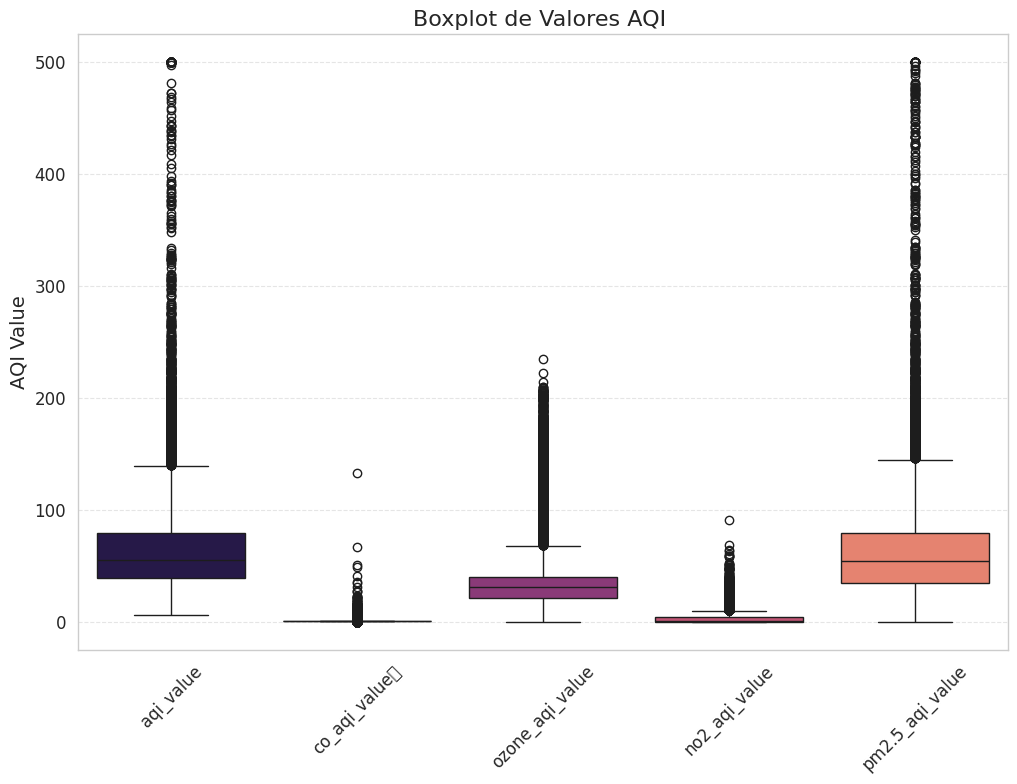

In [ ]:
sns.set_style('whitegrid')
sns.set_palette('magma')

plt.figure(figsize=(12, 8))
sns.boxplot(data=df[['aqi_value', 'co_aqi_value\t', 'ozone_aqi_value', 'no2_aqi_value', 'pm2.5_aqi_value']])
plt.title('Boxplot de Valores AQI ', fontsize=16)
plt.ylabel('AQI Value', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tick_params(axis='both', which='both', length=5, width=1, labelsize=12)

plt.show()

**Agrupamos por categoría de AQI y obtenemos los valores mínimo y máximo de aqi_value**

In [ ]:

aqi_ranges = df.groupby('aqi_category')['aqi_value'].agg(['min', 'max'])

aqi_ranges = aqi_ranges.sort_values(by='max', ascending=False)

country_counts = df.groupby('aqi_category')['country_name'].nunique()

aqi_ranges['country_count'] = country_counts

aqi_ranges['porcentaje'] = (aqi_ranges['country_count'] / aqi_ranges['country_count'].sum()) * 100


aqi_ranges

,min,max,country_count,porcentaje
aqi_category,,,,
Hazardous,300,500,11,2.263374
Very Unhealthy,201,297,20,4.115226
Unhealthy,150,200,68,13.991770
Unhealthy for Sensitive Groups,100,149,95,19.547325
Moderate,51,99,153,31.481481
Good,6,50,139,28.600823


El análisis de la distribución de categorías AQI revela que, a nivel global, la mayoría de los países alrededor de un 60% presentan una calidad del aire entre "Moderada" y "Buena", lo que sugiere que, aunque no óptima, la situación no es crítica en términos generales. Sin embargo, casi un 20% de los países registran niveles "Dañinos para Grupos Sensibles", lo que representa un riesgo significativo para niños, ancianos y personas con enfermedades respiratorias o cardiovasculares.mientras que otro 13% representa un nivel "No Saludable" y un 7% un nivel "Peligroso" para toda las personas que habitan en ciudades con indices aqi muy alto.

**Creamos un grafico en el cual existan los Valores Máximos de AQI por Categoría**

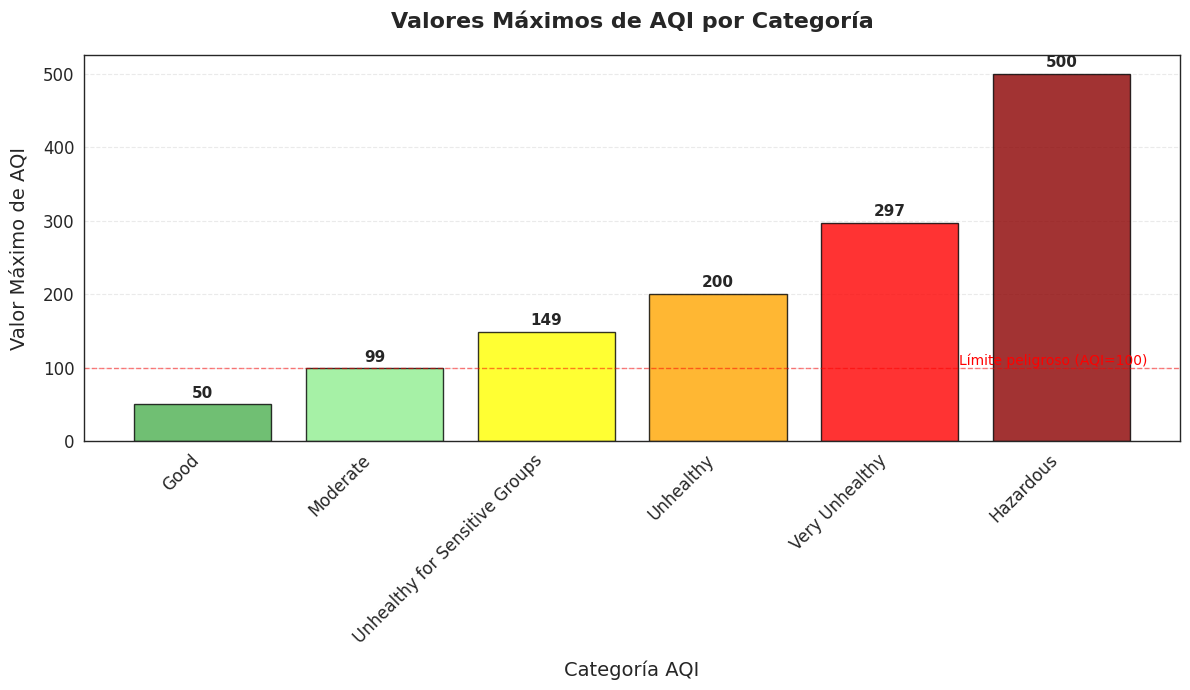

In [ ]:

colors = {
    'Good': '#4CAF50',
    'Moderate': 'lightgreen',
    'Unhealthy for Sensitive Groups': 'yellow',
    'Unhealthy': 'orange',
    'Very Unhealthy': 'red',
    'Hazardous': 'darkred'
}

category_order = ['Good', 'Moderate', 'Unhealthy for Sensitive Groups',
                 'Unhealthy', 'Very Unhealthy', 'Hazardous']

aqi_ranges_ordered = aqi_ranges.loc[category_order]


plt.figure(figsize=(12, 7))
ax = plt.gca()


bars = plt.bar(aqi_ranges_ordered.index,
               aqi_ranges_ordered['max'],
               color=[colors[cat] for cat in aqi_ranges_ordered.index],
               edgecolor='black',
               linewidth=1,
               alpha=0.8)


plt.title('Valores Máximos de AQI por Categoría',
          fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Categoría AQI', fontsize=14, labelpad=10)
plt.ylabel('Valor Máximo de AQI', fontsize=14, labelpad=10)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

plt.axhline(y=100, color='red', linestyle='--', linewidth=1, alpha=0.5)
plt.text(len(category_order)-0.5, 103, 'Límite peligroso (AQI=100)',
         color='red', fontsize=10, ha='right')


for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height+5,
            f'{int(height)}',
            ha='center', va='bottom',
            fontsize=11,
            fontweight='bold')


ax.yaxis.grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()

plt.show()

El análisis de los valores máximos de AQI por categoría revela una relación directa y progresiva entre el aumento del índice y el riesgo para la salud, con umbrales críticos entre ellos podemos mencionar las diferentes recomendaciones según el nivel del AQI

AQI > = 100: Requiere proteger a grupos sensibles (niños, ancianos, pacientes crónicos).

AQI > = 150: Exige intervenciones públicas (reducción de tráfico, limitaciones industriales).

AQI > 300: Emergencia sanitaria con riesgo para toda la población.(Acciones Urgentes para minimizar el impacto sobre la población)

**Top 50 países por promedio de valor AQI**

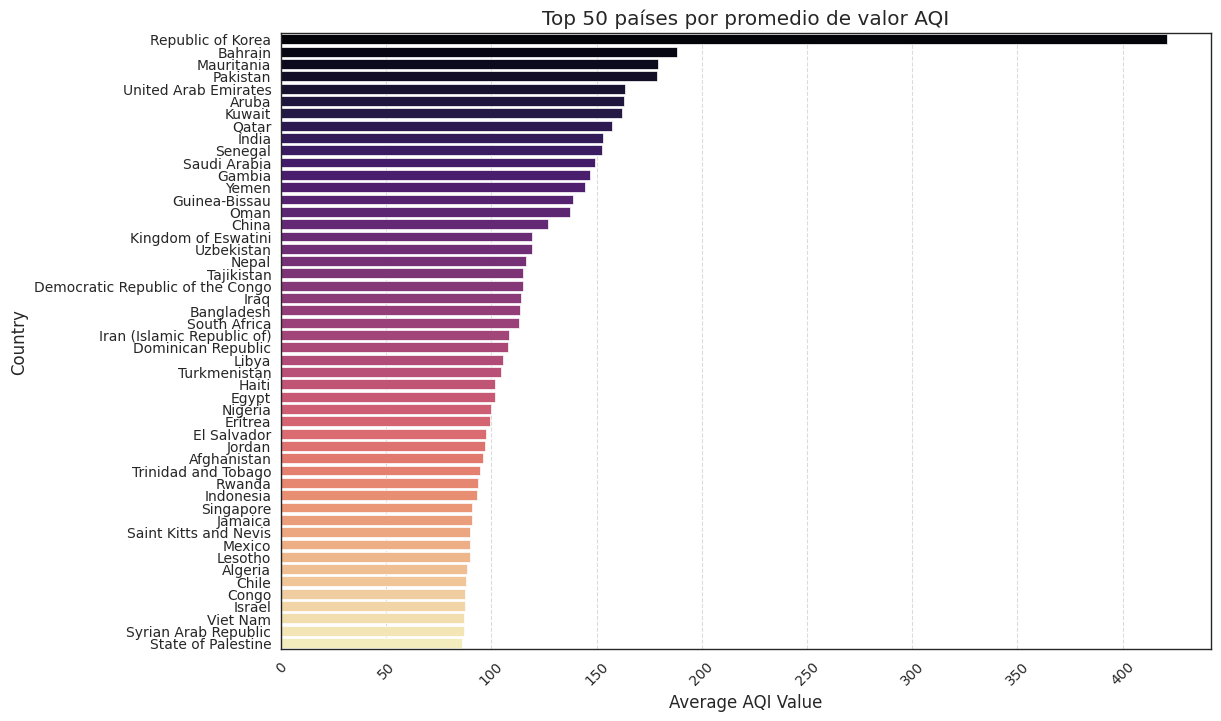

In [ ]:

sns.set_style("white")


avg_aqi_by_country = df.groupby('country_name')['aqi_value'].mean().sort_values(ascending=False)


top_50_countries = avg_aqi_by_country.head(50)


plt.figure(figsize=(12, 8))
sns.barplot(x=top_50_countries.values, y=top_50_countries.index, palette='magma')
plt.title('Top 50 países por promedio de valor AQI')
plt.xlabel('Average AQI Value')
plt.ylabel('Country')
plt.xticks(rotation=45)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

El gráfico presenta los 50 países con los peores promedios de calidad del aire (AQI), destacando patrones geográficos y socioeconómicos clave.
De ello podemos concluir:

**1. Dominio de regiones específicas:**

**Asia Meridional y Oriental:** Países como India, China, Pakistán, Bangladesh y Nepal lideran la lista, reflejando altos niveles de contaminación por industrialización acelerada, densidad poblacional y uso de combustibles fósiles.

**Medio Oriente:** Emiratos Árabes Unidos, Kuwait, Qatar, Arabia Saudita e Irán muestran impactos por actividades petroleras, polvo desértico y urbanización intensiva.

**África :** Senegal, Ghana, República Democrática del Congo y otros enfrentan contaminación por quema de biomasa, minería y falta de regulaciones ambientales.

**2. Factores comunes en países con alto AQI:**
Rápido desarrollo industrial: Muchos países (China, India, Irán) combinan crecimiento económico con altas emisiones.

**Condiciones naturales:** Tormentas de polvo (Medio Oriente, África) y geografía montañosa (Nepal) que atrapan contaminantes.

**Limitada gestión ambiental:**  Falta de políticas públicas efectivas en países en desarrollo.

In [ ]:
# Mapeo de categorías a valores numéricos para ordenamiento
category_order = {
    'Good': 1,
    'Moderate': 2,
    'Unhealthy for Sensitive Groups': 3,
    'Unhealthy': 4,
    'Very Unhealthy': 5,
    'Hazardous': 6
}

# Agregar columna numérica para ordenamiento
df_cleaned['category_order'] = df_cleaned['aqi_category'].map(category_order)

# Obtener los 10 países principales por cada categoría
top_countries_by_category = df_cleaned.groupby(['aqi_category', 'country_name'])['aqi_value'].max().reset_index()
top_countries_by_category = top_countries_by_category.sort_values(['aqi_category', 'aqi_value'], ascending=[True, False])
top_countries = top_countries_by_category.groupby('aqi_category').head(10)

# Obtener las 3 ciudades más contaminadas por país
top_cities = []
for _, row in top_countries.iterrows():
    country = row['country_name']
    category = row['aqi_category']
    cities = df_cleaned[(df_cleaned['country_name'] == country) &
                       (df_cleaned['aqi_category'] == category)]
    cities = cities.nlargest(3, 'aqi_value')[['city_name', 'aqi_value']]
    for _, city_row in cities.iterrows():
        top_cities.append({
            'aqi_category': category,
            'country_name': country,
            'city_name': city_row['city_name'],
            'aqi_value': city_row['aqi_value'],
            'category_order': category_order[category]
        })

# Crear DataFrame para el treemap
treemap_df = pd.DataFrame(top_cities)

# Definir colores basados en los valores máximos por categoría
max_aqi_by_category = treemap_df.groupby('aqi_category')['aqi_value'].max().reset_index()
color_scale = [
    [0.0, 'green'],      # Good
    [0.2, 'lightgreen'], # Moderate
    [0.4, 'yellow'],     # Unhealthy for Sensitive Groups
    [0.6, 'orange'],     # Unhealthy
    [0.8, 'red'],        # Very Unhealthy
    [1.0, 'darkred']     # Hazardous
]

# Crear el treemap jerárquico
fig = px.treemap(
    treemap_df,
    path=['aqi_category', 'country_name', 'city_name'],
    values='aqi_value',
    color='aqi_value',
    color_continuous_scale=color_scale,
    title='Top 10 Países por Categoría de AQI con sus 3 Ciudades Más Contaminadas',
    hover_data=['aqi_value'],
    height=800
)

fig.update_layout(
    margin=dict(t=50, l=25, r=25, b=25),
    coloraxis_colorbar=dict(
        title='Valor AQI',
        tickvals=[50, 100, 150, 200, 300, 500],
        ticktext=['Good (0-50)', 'Moderate (51-100)', 'Unhealthy for SG (101-150)',
                 'Unhealthy (151-200)', 'Very Unhealthy (201-300)', 'Hazardous (300+)']
    )
)


fig.show()

En este treemap podemos observar todas las categorias de todos los paises con los valores de AQI en el cual tambien se encuentran reflejados las 3 principales ciudades tanto de categorias como "Peligrosas" asi como tambien países con valores AQI "Buena"

**Filtramos paises con su principal ciudad con aqi_value que sean Hazerdous**

In [ ]:

hazardous_cities = df_cleaned[df_cleaned['aqi_category'] == 'Hazardous']

max_aqi_cities = hazardous_cities.loc[hazardous_cities.groupby('country_name')['aqi_value'].idxmax()]

result_h= max_aqi_cities[['country_name', 'city_name', 'aqi_value']].sort_values('aqi_value', ascending=False)

result_h


,country_name,city_name,aqi_value
18160,South Africa,Boksburg,500
276,Pakistan,Bahawalnagar,500
470,India,Rania,500
5156,United States of America,Durango,500
22259,Russian Federation,Tynda,500
13398,Democratic Republic of the Congo,Kasongo Lunda,481
1402,Republic of Korea,Seoul,421
11867,China,Chengdu,386
8547,Mexico,Tepeapulco,384
8835,Chile,Lampa,358


**Mapa de contaminación de Ciudades con AQI Peligroso"**

---



In [ ]:

import plotly.express as px

fig = px.choropleth(result_h,
                    locations="country_name",
                    locationmode="country names",
                    color="aqi_value",
                    hover_name="city_name",
                    hover_data=["aqi_value"],
                    title="Mapa de contaminación de Ciudades con AQI Peligroso",
                    color_continuous_scale=px.colors.sequential.Reds
                   )

fig.show()


**Filtramos paises con su principal ciudad con aqi_value que sean Very Unhealthy**

In [ ]:

very_unhealthy_countries = df_cleaned[df_cleaned['aqi_category'] == 'Very Unhealthy']

main_cities = very_unhealthy_countries.groupby('country_name')['city_name'].first().reset_index()

main_cities = pd.merge(main_cities, df_cleaned[['country_name', 'city_name', 'aqi_value']], on=['country_name', 'city_name'], how='left')

main_cities = main_cities.sort_values('aqi_value', ascending=False)

main_cities


,country_name,city_name,aqi_value
0,Angola,Caxito,285
1,Australia,Palmerston,264
8,Indonesia,Leuwiliang,264
7,India,Darbhanga,247
4,Chile,San Bernardo,240
3,Brazil,Sao Goncalo,232
13,Namibia,Luderitz,232
16,Pakistan,Kot Radha Kishan,230
11,Mauritania,Bababe,224
19,South Africa,Ballitoville,222


**Mapa de contaminación de Ciudades con AQI Very Unhealthy"**



In [ ]:

import plotly.express as px

fig = px.choropleth(main_cities,
                    locations='country_name',
                    locationmode='country names',
                    color='aqi_value',
                    hover_name='city_name',
                    color_continuous_scale='Reds',
                    title='Mapa de contaminación de Ciudades con AQI Very Unhealthy',
                    range_color=[0, main_cities['aqi_value'].max()])

fig.show()


**Filtramos paises con su principal ciudad con aqi_value que sean Unhealthy**

In [ ]:

unhealthy_countries = df_cleaned[df_cleaned['aqi_category'] == 'Unhealthy']

principal_cities = unhealthy_countries.groupby('country_name').first().reset_index()

result_unhealthy = principal_cities[['country_name', 'city_name', 'aqi_value']]

result_unhealthy = result_unhealthy.sort_values('aqi_value', ascending=False)

result_unhealthy


,country_name,city_name,aqi_value
49,Saudi Arabia,Riyadh,196
23,Guinea-Bissau,Bissora,195
5,Bangladesh,Rajshahi,191
52,South Africa,Koppies,191
4,Bahrain,Manama,188
...,...,...,...
27,Iraq,Rawah,150
9,China,Pingyin,150
14,Egypt,Abnub,150
55,Tajikistan,Boshkengash,150


**Mapa de contaminación de Ciudades con AQI Unhealthy"**


In [ ]:

import plotly.express as px

fig = px.choropleth(result_unhealthy,
                    locations="country_name",
                    locationmode="country names",
                    color="aqi_value",
                    hover_name="city_name",
                    hover_data=["aqi_value"],
                    title="Mapa de contaminación de Ciudades con AQI Unhealthy",
                    color_continuous_scale=px.colors.sequential.Oranges
                   )

fig.show()


**Filtramos paises con su principal ciudad con aqi_value que sean Unhealthy for a sensitive groups**

In [ ]:

unhealthy_sensitive_countries = df_cleaned[df_cleaned['aqi_category'] == 'Unhealthy for Sensitive Groups']

principal_cities = unhealthy_sensitive_countries.groupby('country_name').first().reset_index()

result_fsg = principal_cities[['country_name', 'city_name', 'aqi_value']]

result_fsg = result_fsg.sort_values('aqi_value', ascending=False)

result_fsg


,country_name,city_name,aqi_value
83,Trinidad and Tobago,Marabella,148
54,Myanmar,Akyab,145
93,Yemen,Yarim,145
58,Nicaragua,Chinandega,143
14,China,Tianjin,142
...,...,...,...
5,Armenia,Masis,100
16,Congo,Loubomo,100
32,Guinea,Tondon,100
53,Mongolia,Hovd,100


**Mapa de contaminación de Ciudades con AQI Unhealthy for Sensitive Groups"**


In [ ]:
import plotly.express as px

fig = px.choropleth(result_fsg,
                    locations="country_name",
                    locationmode="country names",
                    color="aqi_value",
                    hover_name="city_name",
                    hover_data=["aqi_value"],
                    title="Mapa de contaminación: Ciudades con AQI Unhealthy for Sensitive Groups",
                    color_continuous_scale=px.colors.sequential.YlOrBr
                   )

fig.show()


**Filtramos paises con su principal ciudad con aqi_value que sean Moderate**

In [ ]:

moderate_countries = df_cleaned[df_cleaned['aqi_category'] == 'Moderate']

principal_cities = moderate_countries.groupby('country_name').first().reset_index()

result_moderate = principal_cities[['country_name', 'city_name', 'aqi_value']]

result_moderate = result_moderate.sort_values('aqi_value', ascending=False)

result_moderate


,country_name,city_name,aqi_value
123,Somalia,Garowe,98
46,Ethiopia,Asosa,97
45,Estonia,Tallinn,96
96,Nepal,Bharatpur,93
65,Israel,Tamra,92
...,...,...,...
80,Lithuania,Gargzdai,51
74,Lao People's Democratic Republic,Savannakhet,51
113,Russian Federation,Praskoveya,51
144,United Republic of Tanzania,Dar Es Salaam,51


**Mapa de contaminación de Ciudades con AQI Unhealthy for Moderate"**


In [ ]:

fig = px.choropleth(result_moderate,
                    locations="country_name",
                    locationmode="country names",
                    color="aqi_value",
                    hover_name="city_name",
                    hover_data=["aqi_value"],
                    title="Mapa de contaminación de Ciudades con AQI Moderate",
                    color_continuous_scale=px.colors.sequential.Greens
                   )

fig.show()


**Filtramos paises con su principal ciudad con aqi_value que sean Good**

In [ ]:

good_countries = df_cleaned[df_cleaned['aqi_category'] == 'Good']

principal_cities = good_countries.groupby('country_name').first().reset_index()

result_good = principal_cities[['country_name', 'city_name', 'aqi_value']]

result_good = result_good.sort_values('aqi_value', ascending=False)

result_good


,country_name,city_name,aqi_value
48,Gabon,Makokou,50
57,Hungary,Szeged,50
17,Bosnia and Herzegovina,Cazin,50
49,Georgia,Zugdidi,50
67,Kazakhstan,Pavlodar,50
...,...,...,...
5,Argentina,Chacabuco,17
29,Chile,Punta Arenas,17
96,Palau,Koror,16
87,Myanmar,Loikaw,15


**Mapa de contaminación de Ciudades con AQI Good"**

In [ ]:

import plotly.express as px

fig = px.choropleth(result_good,
                    locations="country_name",
                    locationmode="country names",
                    color="aqi_value",
                    hover_name="city_name",
                    hover_data=["aqi_value"],
                    title="Mapa de contaminación de Ciudades con AQI Good",
                    color_continuous_scale=px.colors.sequential.Greens # Use a green color scale
                   )

fig.show()


**Mapa Mapa de contaminación de Ciudades con AQI por nivel de peso**

In [ ]:

import plotly.express as px

fig = px.choropleth(df_cleaned,
                    locations="country_name",
                    locationmode="country names",
                    color="aqi_category",
                    hover_name="country_name",
                    hover_data=["aqi_value", "aqi_category"],
                    title="World Map of Air Quality Categories",
                    color_discrete_map={
                        'Good': '#4CAF50',
                        'Moderate': 'lightgreen',
                        'Unhealthy for Sensitive Groups': 'yellow',
                        'Unhealthy': 'orange',
                        'Very Unhealthy': 'red',
                        'Hazardous': 'darkred'
                    }
                   )

fig.show()
